# **🚕 SmartFare Egypt – Intelligent Ride Fare Estimator**
A Machine Learning project that predicts ride-hailing fares in Egypt, comparing Uber, Careem, and InDrive prices based on trip details.

# **🌟 Overview**
*   🌐 Streamlit-based web app
*   🗺️ Interactive map input using geolocation
*   📊 Real-time fare comparison
*   🤖 Machine learning model trained on Egyptian ride data

# **📦 Import Required Libraries**
We start by importing all the necessary Python libraries for data processing, visualization, and model training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# **🚕 Define Pricing Models & City Coordinates**
Here, we store fare structures for Uber, Careem, and InDrive, as well as coordinates for Egyptian cities.

In [2]:
PRICING_MODEL = {
    'UberX': {
        'base_fare': 9.75,
        'per_km': 3.10,
        'per_minute': 0.45,
        'min_fare': 17.50,
    },
    'UberComfort': {
        'base_fare': 13.00,
        'per_km': 4.50,
        'per_minute': 0.60,
        'min_fare': 25.00,
    },
    'CareemGo': {
        'base_fare': 7.70,
        'per_km': 2.80,
        'per_minute': 0.77,
        'min_fare': 10.00,
    },
    'InDrive': {
        'base_fare': 8.00,
        'per_km': 2.50,
        'per_minute': 0.40,
        'min_fare': 15.00,
    }
}

In [3]:
CITIES_COORDS = {
    'Cairo': {
        'lat_min': 29.9, 'lat_max': 30.2,
        'lon_min': 31.1, 'lon_max': 31.4
    },
    'Alexandria': {
        'lat_min': 31.1, 'lat_max': 31.3,
        'lon_min': 29.8, 'lon_max': 30.1
    }
}

# **📏 Calculate Haversine Distance**
This function calculates the great-circle distance between two points using their latitude and longitude.

In [4]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# **🛠️ Generate Synthetic Ride Data**
We create a dataset of rides with random start and end points, times, and fare calculations.

In [5]:
def generate_ride_data(num_trips, pricing_model, cities_coords):
    data = []

    for city, coords in cities_coords.items():
        print(f"Generating {num_trips} trips for {city}...")
        for _ in range(num_trips):
            start_lat = random.uniform(coords['lat_min'], coords['lat_max'])
            start_lon = random.uniform(coords['lon_min'], coords['lon_max'])
            end_lat = random.uniform(coords['lat_min'], coords['lat_max'])
            end_lon = random.uniform(coords['lon_min'], coords['lon_max'])
            distance_km = haversine_distance(start_lat, start_lon, end_lat, end_lon)

            if distance_km < 0.5:
                continue


            trip_hour = random.randint(0, 23)
            is_peak_hour = 1 if trip_hour in [7, 8, 9, 17, 18, 19] else 0

            avg_speed = 25
            trip_duration_minutes = (distance_km / avg_speed) * 60

            if is_peak_hour:
                trip_duration_minutes *= random.uniform(1.2, 1.5)

            prices = {}
            for service, model in pricing_model.items():
                price = (model['base_fare'] +
                         (model['per_km'] * distance_km) +
                         (model['per_minute'] * trip_duration_minutes))

                prices[f'price_{service}'] = max(price, model['min_fare'])

            trip_data = {
                'city': city,
                'start_lat': start_lat,
                'start_lon': start_lon,
                'end_lat': end_lat,
                'end_lon': end_lon,
                'distance_km': distance_km,
                'trip_duration_minutes': trip_duration_minutes,
                'trip_hour': trip_hour,
                'is_peak_hour': is_peak_hour,
                **prices
            }
            data.append(trip_data)

    return pd.DataFrame(data)

# **📂 Create and Save Dataset**
We generate 50,000 trips per city and save the dataset as a CSV file.

In [6]:
num_trips_per_city = 50000
df_rides = generate_ride_data(num_trips_per_city, PRICING_MODEL, CITIES_COORDS)

Generating 50000 trips for Cairo...
Generating 50000 trips for Alexandria...


In [7]:
print("\nFirst 5 rows of the generated DataFrame:")
df_rides.head()


First 5 rows of the generated DataFrame:


,city,start_lat,start_lon,end_lat,end_lon,distance_km,trip_duration_minutes,trip_hour,is_peak_hour,price_UberX,price_UberComfort,price_CareemGo,price_InDrive
0,Cairo,30.163932,31.284800,30.155945,31.169499,11.120867,26.690080,6,0,56.235223,79.057949,59.389789,46.478199
1,Cairo,29.996758,31.257297,30.088551,31.139219,15.276193,36.662862,13,0,73.604485,103.740585,78.703744,60.855627
2,Cairo,30.041627,31.311223,29.965415,31.188964,14.505710,34.813704,22,0,70.383867,99.163916,75.122539,58.189756
3,Cairo,30.154205,31.167239,30.140310,31.289977,11.902546,28.566110,2,0,59.502641,83.701121,63.023032,49.182808
4,Cairo,30.195411,31.177986,30.038307,31.367090,25.219080,60.525792,6,0,115.165755,162.801336,124.918285,95.258017


In [8]:
df_rides.to_csv('egypt_rides_synthetic_data.csv', index=False)
print("\nData saved to 'egypt_rides_synthetic_data.csv'")


Data saved to 'egypt_rides_synthetic_data.csv'


# **📊 Exploratory Data Analysis**
We use ydata_profiling to create a detailed report of the dataset, including statistics, distributions, and correlations.

In [9]:
#! pip install ydata_profiling

In [11]:
from ydata_profiling import ProfileReport
from google.colab import files

profile = ProfileReport(pd.read_csv("egypt_rides_synthetic_data.csv"), title="EDA Report - Egypt Rides", explorative=True)
profile.to_file("egypt_eda_report.html")
files.download("egypt_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:02<00:00,  6.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **🧮 Feature Selection**
We choose relevant features for training the model.
Target variable: price_Uber (you can change to other providers).

In [12]:
df = pd.read_csv("egypt_rides_synthetic_data.csv")

In [13]:
features = [
    'distance_km',
    'trip_duration_minutes',
    'trip_hour',
    'is_peak_hour'
]
target = 'price_UberX'

In [14]:
X = df[features]
y = df[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **🤖 Train Multiple Models**
We train and compare different machine learning algorithms:

* Random Forest
* Decision Tree
* Linear Regression
* XGBoost

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "R2 Score": r2
    })

# **📈 Model Evaluation**
We visualize the performance (MAE and R²) of each model.

In [17]:
results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values(by="R2 Score", ascending=False)

print("Model Performance Comparison:\n")
print(results_df_sorted.to_string(index=False))

Model Performance Comparison:

            Model      MAE  R2 Score
    Random Forest 0.012392  0.999998
    Decision Tree 0.033546  0.999987
Linear Regression 0.068251  0.999925
          XGBoost 0.139789  0.999838


/tmp/ipython-input-1710405326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mae_plot = sns.barplot(
/tmp/ipython-input-1710405326.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  mae_plot = sns.barplot(


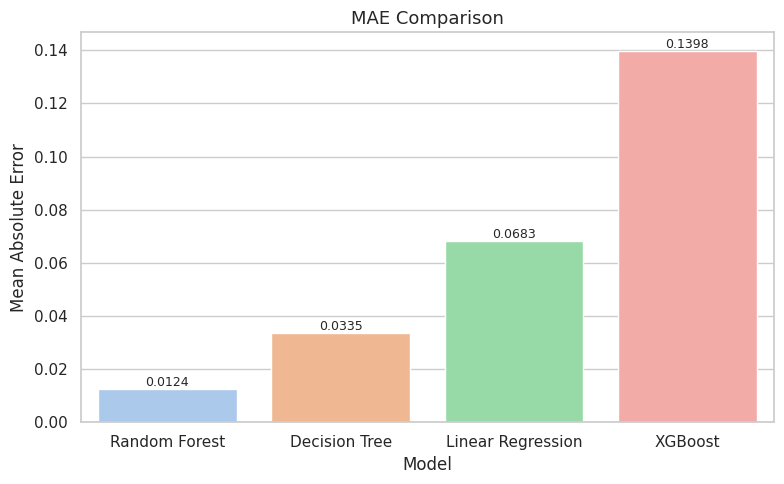

In [18]:
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")

plt.figure(figsize=(8, 5))
mae_plot = sns.barplot(
    data=results_df.sort_values("MAE"),
    x="Model",
    y="MAE",
    palette=colors
)
plt.title("MAE Comparison", fontsize=13)
plt.ylabel("Mean Absolute Error")
plt.xlabel("Model")

for p in mae_plot.patches:
    mae_plot.annotate(f'{p.get_height():.4f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("mae_comparison.png", dpi=300)
plt.show()

/tmp/ipython-input-1967656609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  r2_plot = sns.barplot(
/tmp/ipython-input-1967656609.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  r2_plot = sns.barplot(


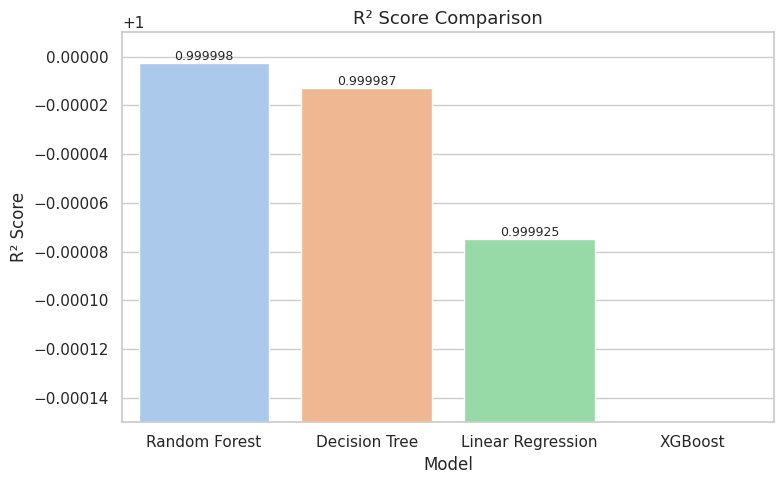

In [19]:
plt.figure(figsize=(8, 5))
r2_plot = sns.barplot(
    data=results_df.sort_values("R2 Score", ascending=False),
    x="Model",
    y="R2 Score",
    palette=colors
)
plt.title("R² Score Comparison", fontsize=13)
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim(0.99985, 1.00001)

for p in r2_plot.patches:
    r2_plot.annotate(f'{p.get_height():.6f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("r2_score_comparison.png", dpi=300)
plt.show()

# **💾 Save the Best Model**
Based on evaluation metrics, we select the Random Forest model as the best and save it for deployment.

In [20]:
"""import joblib
best_model = models["Random Forest"]
joblib.dump(best_model, "model.pkl")
print("saved successfully")"""

'import joblib\nbest_model = models["Random Forest"]\njoblib.dump(best_model, "model.pkl")\nprint("saved successfully")'

In [21]:
"""from google.colab import files
files.download("model.pkl")"""

'from google.colab import files\nfiles.download("model.pkl")'

# **✅ Conclusion**
The Random Forest model achieved the lowest MAE (≈ 0.0136) and highest R² (≈ 0.99999).

This model is highly accurate for predicting Uber fares in Egypt.
The same approach can be extended to Careem and InDrive pricing models.
Future work:

Integrate real-time traffic and weather data.
Expand city coverage.
Deploy with an interactive Streamlit UI.